In [26]:
import os, shutil
import matplotlib.pyplot as plt

from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

# Data split

In [27]:
# Original dataset directory
original_dataset_dir = '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog'

# Working directory
base_dir = '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/SmallDataset'
os.mkdir(base_dir)

# Creating Train, Validation and Test directory
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)


# Cats directories for train, test and validation
train_cats_dir = os.path.join(train_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(train_cats_dir)
os.mkdir(test_cats_dir)
os.mkdir(validation_cats_dir)

# Dogs directories for train, test and validation
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(train_dogs_dir)
os.mkdir(test_dogs_dir)
os.mkdir(validation_dogs_dir)




print('successful')

successful


# Copy data 

In [28]:
# First 1000 cat images are to be copied on train_cat_dir
file_names =  ['cat.{}.jpg'.format(i) for i in range(1000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [29]:
# 500 cat images for validation
file_names = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [30]:
# 500 cat images for testing
file_names = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [31]:
# 1000 dog images for training
file_names = ['dog.{}.jpg'.format(i) for i in range(1000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_dogs_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [32]:
# 500 dog images for validation
file_names = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_dogs_dir, file_name)
    shutil.copyfile(src, dst)
    
print('successful')

successful


In [33]:
# 500 dogs images for testing
file_names = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_dogs_dir, file_name)
    shutil.copyfile(src, dst)
    
print('successful')

successful


# Building a network
<!--  -->Based on the data we have, this is a balanced-binary classification where accuracy is an appropriate measure for success

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

# Compilation

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Data Preprocessing

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

for data_batch, label_batch in train_generator:
    print('Data batch shape: ', data_batch.shape)
    print('Label batch shape', label_batch.shape)
    break



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data batch shape:  (20, 150, 150, 3)
Label batch shape (20,)


# Model Training

In [37]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 31s 306ms/step - loss: 0.7230 - accuracy: 0.5285 - val_loss: 0.6359 - val_accuracy: 0.6090
Epoch 2/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6821 - accuracy: 0.6005 - val_loss: 0.5065 - val_accuracy: 0.6420
Epoch 3/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6335 - accuracy: 0.6545 - val_loss: 0.5589 - val_accuracy: 0.6650
Epoch 4/20
100/100 [==============================] - 15s 155ms/step - loss: 0.5919 - accuracy: 0.7090 - val_loss: 0.5314 - val_accuracy: 0.6850
Epoch 5/20
100/100 [==============================] - 17s 167ms/step - loss: 0.5314 - accuracy: 0.7295 - val_loss: 0.4773 - val_accuracy: 0.6930
Epoch 6/20
100/100 [==============================] - 18s 184ms/step - loss: 0.4842 - accuracy: 0.7690 - val_loss: 0.5556 - val_accuracy: 0.7070
Epoch 7/20
100/100 [==============================] - 15s 152ms/step - loss: 0.4258 - accuracy: 0.8075 - val_loss: 0.5084 - val_ac

# Saving a model

In [38]:
model.save('image_classifier_1.h5')

# Visual Exploration

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

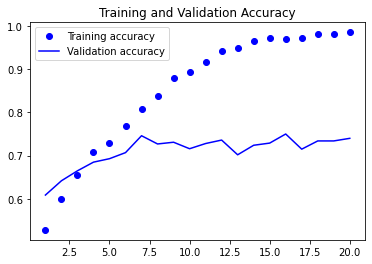

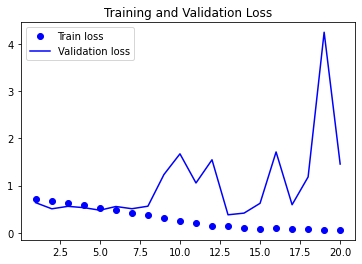

In [40]:
# Data acquisition
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,  len(history_dict['accuracy']) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b',  label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()